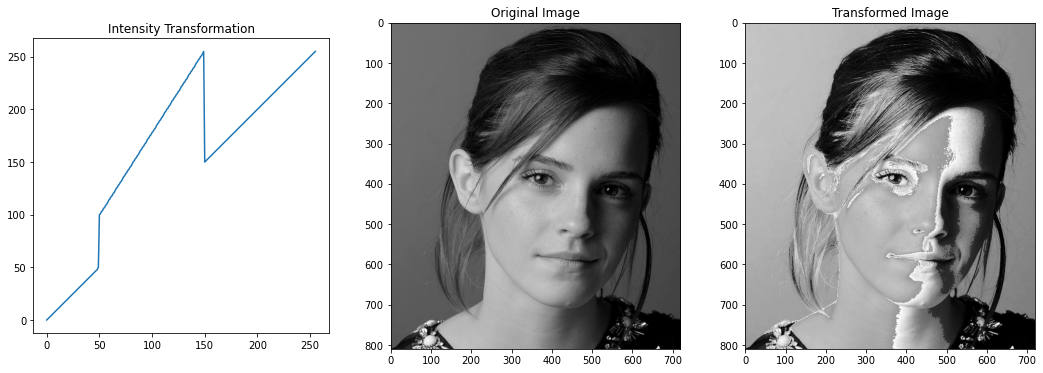

In [1]:
#Q1
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img1 = cv.imread(r"C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\emma_gray.jpg")
assert img1 is not None

transform1 = np.linspace(0,50,50)
transform2 = np.linspace(50,100,0)
transform3 = np.linspace(100,255,100)
transform4 = np.linspace(255,150,0)
transform5 = np.linspace(150,255,106)
transform = np.concatenate((transform1,transform2,transform3,transform4,transform5), axis = 0).astype(np.uint8)

trans_img = cv.LUT(img1, transform)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[0].set_title('Intensity Transformation')
ax[1].imshow(img1)
ax[1].set_title('Original Image')
ax[2].imshow(trans_img)
ax[2].set_title('Transformed Image')
plt.show()

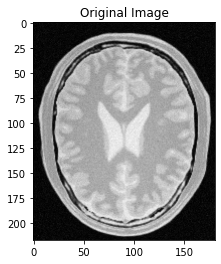

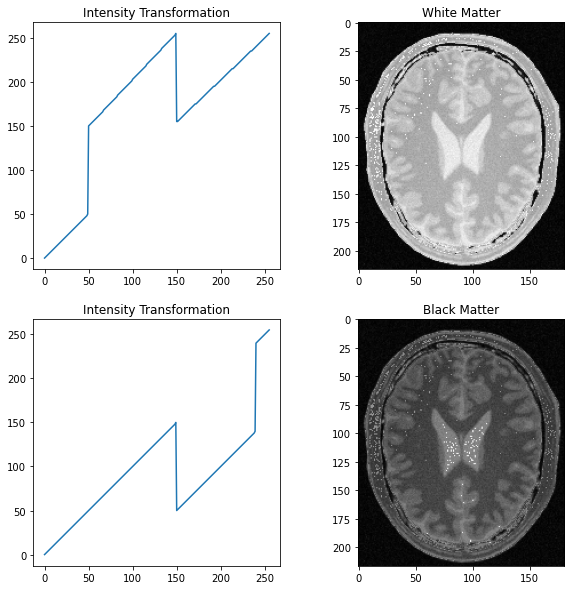

In [2]:
#Q2
img2 = cv.imread(r"C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\brain_proton_density_slice.png")
assert img2 is not None


transforma1 = np.linspace(0,50,50)
transforma2 = np.linspace(50,150,0)
transforma3 = np.linspace(150,255,100)
transforma4 = np.linspace(255,155,0)
transforma5 = np.linspace(155,255,106)
transforma = np.concatenate((transforma1,transforma2,transforma3,transforma4,transforma5), axis = 0).astype(np.uint8)

transformb1 = np.linspace(0,150,150)
transformb2 = np.linspace(150,50,0)
transformb3 = np.linspace(50,140,90)
transformb4 = np.linspace(140,240,0)
transformb5 = np.linspace(240,255,16)
transformb = np.concatenate((transformb1,transformb2,transformb3,transformb4,transformb5), axis = 0).astype(np.uint8)

trans_imga = cv.LUT(img2, transforma)
trans_imgb = cv.LUT(img2, transformb)

fig,ax=plt.subplots()
ax.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax.set_title('Original Image')

fig,ax=plt.subplots(2,2, figsize=(10,10))
ax[0,0].plot(transforma)
ax[0,0].set_aspect('equal')
ax[0,0].set_title('Intensity Transformation')
ax[0,1].imshow(cv.cvtColor(trans_imga, cv.COLOR_BGR2RGB))
ax[0,1].set_title('White Matter')
ax[1,0].plot(transformb)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('Intensity Transformation')
ax[1,1].imshow(cv.cvtColor(trans_imgb, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Black Matter')
plt.show()

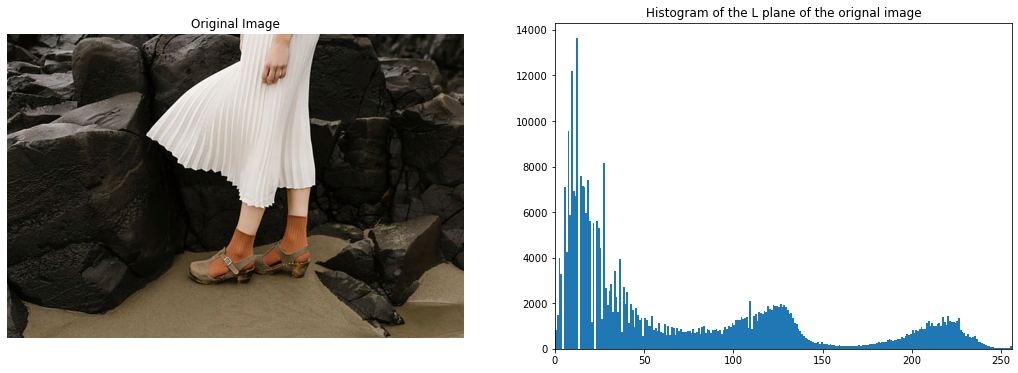

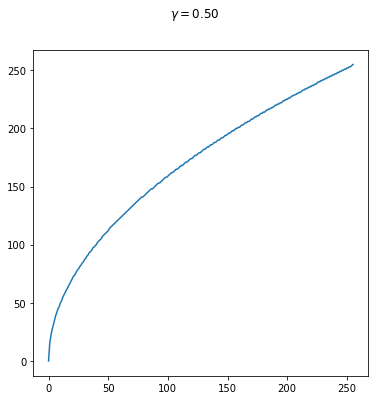

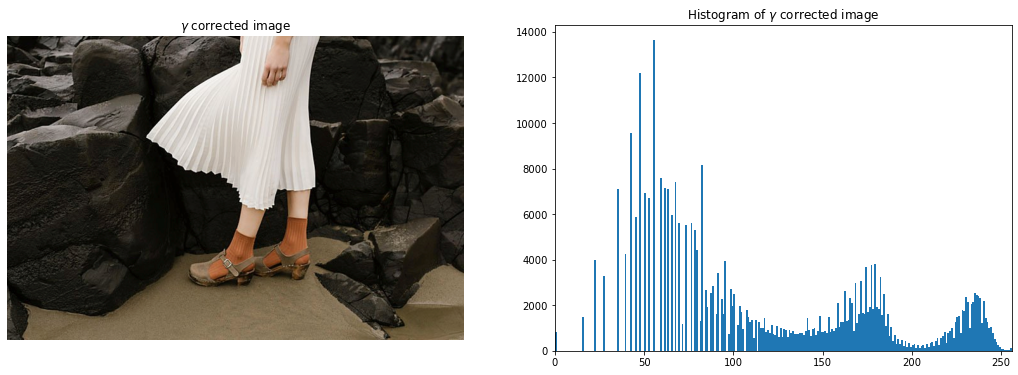

In [8]:
#Q3
img3 = cv.imread(r'C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\highlights_and_shadows.jpg')
assert img0 is not None


img3 = cv.cvtColor(img3, cv.COLOR_BGR2Lab)

L = img3[:,:,0]
a = img3[:,:,1]
b = img3[:,:,2]

#hist_org = cv.calcHist([L], [0], None, [256], [0,256])


fig, ax = plt.subplots(1,2,figsize = (18,6))
ax[0].set_title('Original Image')
ax[0].imshow(cv.cvtColor(img3, cv.COLOR_Lab2RGB))
ax[0].axis('off')
#ax[1].plot(hist_org)
ax[1].set_xlim([0, 256])
ax[1].set_title('Histogram of the L plane of the orignal image')
ax[1].hist(L.flatten(), 256, [0, 256])

gamma = 0.5

gamma_trans = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)

fig, ax = plt.subplots(figsize = (6,6))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax.plot(gamma_trans)



#print(L[0][0],L2[0][0])

L = cv.LUT(L, gamma_trans)

#print(L2.shape, type(lt))

#corrected_hist = cv.calcHist([L], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,2,figsize = (18,6))
#fig.suptitle('$ \gamma = %.2f$'%gamma)

# ax[0].set_aspect('equal')
ax[0].imshow(cv.cvtColor(img3, cv.COLOR_Lab2RGB))
ax[0].set_title('$\gamma$ corrected image')
ax[0].axis('off')
ax[1].set_xlim([0, 256])
ax[1].hist(L.flatten(), 256, [0, 256])
ax[1].set_title('Histogram of $\gamma$ corrected image')